In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./Data/Sam_Data/combined.csv')
df = df.dropna()
# Find the number of unique items in each column
unique_counts = df.nunique()

unique_items = df['Sensor'].unique()

# Display the results
print(unique_counts)
print(unique_items)

Unnamed: 0    268024
DateTime       17754
Sensor             9
Value              2
Timestamp      10696
dtype: int64
['bathroom_door' 'bathroom_button' 'bathroom_light' 'bedroom_light'
 'bedroom_button' 'kitchen_light' 'kitchen_motion' 'living_button'
 'living_light']


In [30]:
from datetime import datetime

def convert_to_seconds(date_str):
    date_obj = datetime.strptime(date_str, '%m/%d/%Y %H:%M:%S')
    return int(date_obj.timestamp())

df['seconds_since_epoch'] = df['Timestamp'].apply(convert_to_seconds)
print(df.head())

   Unnamed: 0 DateTime           Sensor  Value            Timestamp  \
0           0  36:22.9    bathroom_door    0.0  12/20/2022 17:36:23   
1           1  36:24.2    bathroom_door    0.0  12/20/2022 17:36:24   
2           2  36:24.2  bathroom_button    0.0  12/20/2022 17:36:24   
3           3  36:24.2    bathroom_door    0.0  12/20/2022 17:36:24   
4           4  36:24.6   bathroom_light    1.0  12/20/2022 17:36:25   

   seconds_since_epoch  
0           1671579383  
1           1671579384  
2           1671579384  
3           1671579384  
4           1671579385  


In [31]:
# Sample the data on different time frames and get sum of the active sensors on that data

df['date'] = pd.to_datetime(df['Timestamp']) #convert the Timestamp to datetime
df = df.set_index('date') #make the date column as index
df_hourly = df.Value.resample('h').sum() #resample on hourly basis and get summary of sensor values on that hour.

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_minute = df.Value.resample('15min').sum()

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_2hours = df.Value.resample('2h').sum()

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_6hours = df.Value.resample('6h').sum()

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_day = df.Value.resample('1d').sum()

# df_hourly.columns = ['date', 'values']
df_hourly = df_hourly.reset_index()
df_minute = df_minute.reset_index()
df_2hours = df_2hours.reset_index()
df_6hours = df_6hours.reset_index()
df_day = df_day.reset_index()

# new_df = pd.DataFrame(df_hourly, columns=['datetime', 'values'])
print(df_hourly.columns, df_minute.shape, df_2hours.shape, df_hourly.size)
print(df.head(10))

Index(['date', 'Value'], dtype='object') (2586, 2) (324, 2) 1294
                     Unnamed: 0 DateTime           Sensor  Value  \
date                                                               
2022-12-20 17:36:23           0  36:22.9    bathroom_door    0.0   
2022-12-20 17:36:24           1  36:24.2    bathroom_door    0.0   
2022-12-20 17:36:24           2  36:24.2  bathroom_button    0.0   
2022-12-20 17:36:24           3  36:24.2    bathroom_door    0.0   
2022-12-20 17:36:25           4  36:24.6   bathroom_light    1.0   
2022-12-20 17:36:27           5  36:27.1    bathroom_door    1.0   
2022-12-20 17:36:27           6  36:27.1    bathroom_door    1.0   
2022-12-20 17:41:30           7  41:29.8    bathroom_door    1.0   
2022-12-20 17:56:06           8  56:06.3    bathroom_door    1.0   
2022-12-20 17:56:16           9  56:16.0    bathroom_door    1.0   

                               Timestamp  seconds_since_epoch  
date                                                  

                     Unnamed: 0 DateTime          Sensor  Value  \
date                                                              
2023-01-01 00:04:08           0  04:08.2   kitchen_light    0.0   
2023-01-01 00:04:08           1  04:08.2  kitchen_motion    0.0   
2023-01-01 00:29:07           3  29:07.3  kitchen_motion    0.0   
2023-01-01 00:29:07           2  29:07.3   kitchen_light    0.0   
2023-01-01 00:54:05           5  54:05.4  kitchen_motion    0.0   
2023-01-01 00:54:05           4  54:05.4   kitchen_light    0.0   
2023-01-01 01:18:54           7  18:53.7  kitchen_motion    0.0   
2023-01-01 01:18:54           6  18:53.7   kitchen_light    0.0   
2023-01-01 01:43:59           8  43:58.7   kitchen_light    0.0   
2023-01-01 01:43:59           9  43:58.7  kitchen_motion    0.0   

                            Timestamp  seconds_since_epoch                date  
date                                                                            
2023-01-01 00:04:08  1/1/2023 0:0

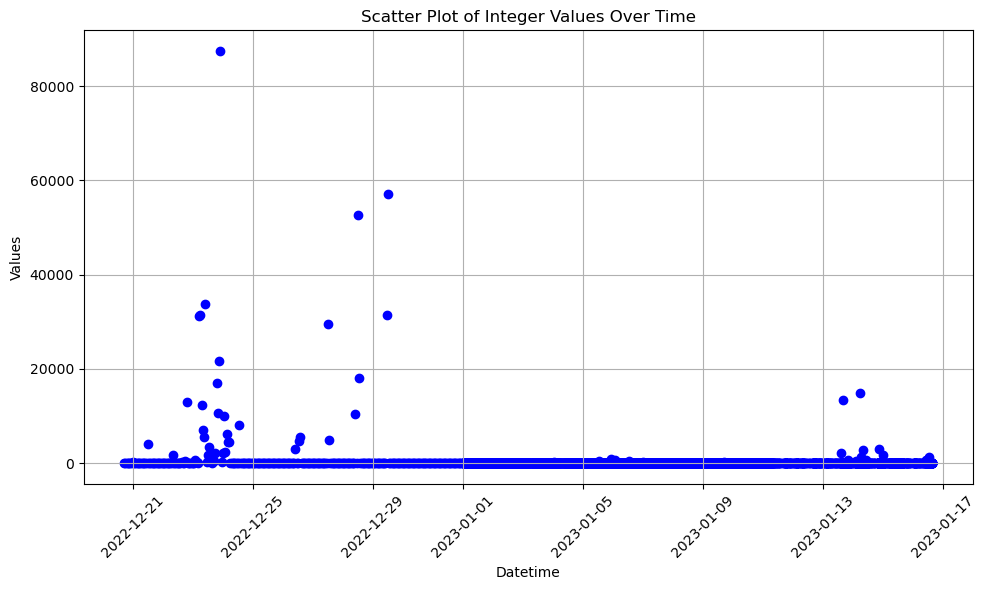

In [61]:

# df_hourly['datetime'] = pd.to_datetime(df_hourly['date'])
# df_small = df.set_index('date')
start_date = '2023-01-01'
end_date = '2023-06-06'

# Filter the data for the specific date range (inclusive)
df_small = df.sort_index().loc[start_date:end_date]
# df_small.reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(df_hourly['date'], df_hourly['Value'], color='blue', marker='o')
plt.scatter(df_small.index, df_small['Value'], color='blue', marker='o')
print(df_small.head(10))

# Formatting the plot
plt.title('Scatter Plot of Integer Values Over Time')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

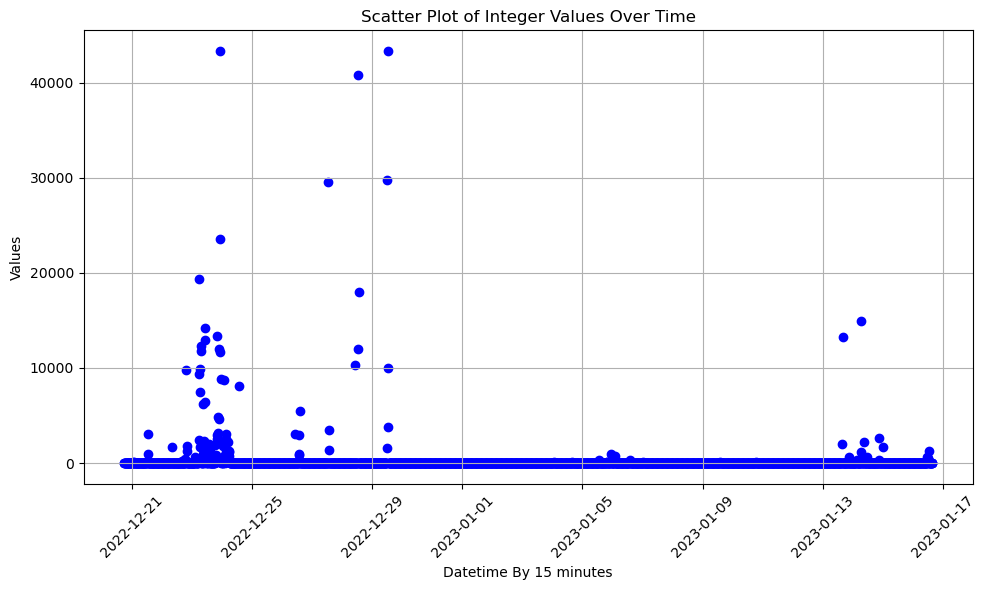

In [5]:
# df_hourly['datetime'] = pd.to_datetime(df_hourly['date'])
plt.figure(figsize=(10, 6))
plt.scatter(df_minute['date'], df_minute['Value'], color='blue', marker='o')

# Formatting the plot
plt.title('Scatter Plot of Integer Values Over Time')
plt.xlabel('Datetime By 15 minutes')
plt.ylabel('Values')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

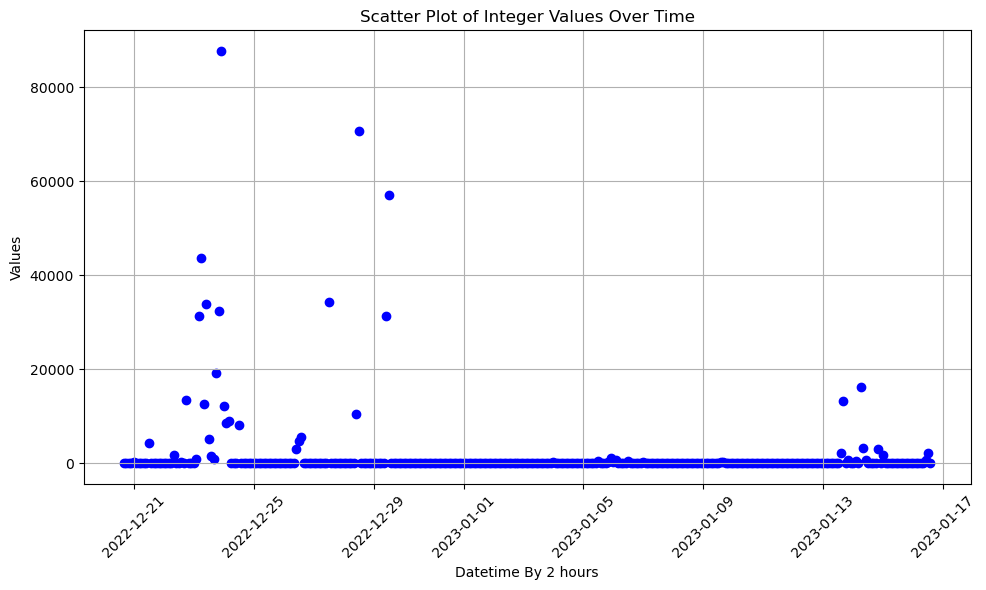

In [6]:
# df_hourly['datetime'] = pd.to_datetime(df_hourly['date'])
plt.figure(figsize=(10, 6))
plt.scatter(df_2hours['date'], df_2hours['Value'], color='blue', marker='o')

# Formatting the plot
plt.title('Scatter Plot of Integer Values Over Time')
plt.xlabel('Datetime By 2 hours')
plt.ylabel('Values')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

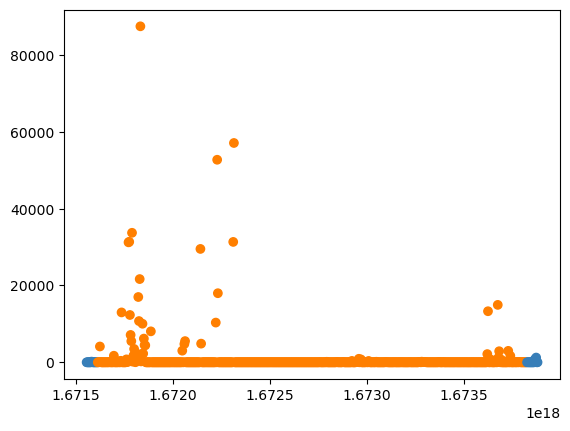

In [7]:
# Fit the model 
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

df_hourly['date'] = df_hourly['date'].values.astype("float64")
df_hourly['Value'] = df_hourly['Value'].values.astype("float64")

clf = LocalOutlierFactor(n_neighbors=30, contamination=0.05) 
y_pred = clf.fit_predict(df_hourly) 
# Generate colors based on the prediction
colors = np.array(['#377eb8', '#ff7f00']) 
plt.scatter(df_hourly['date'], df_hourly['Value'], color=colors[(y_pred + 1) // 2])

{0: 66, 1: 68, 2: 58, 3: 69, 4: 62, 5: 67, 6: 63, 7: 69, 8: 59, 9: 66}


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


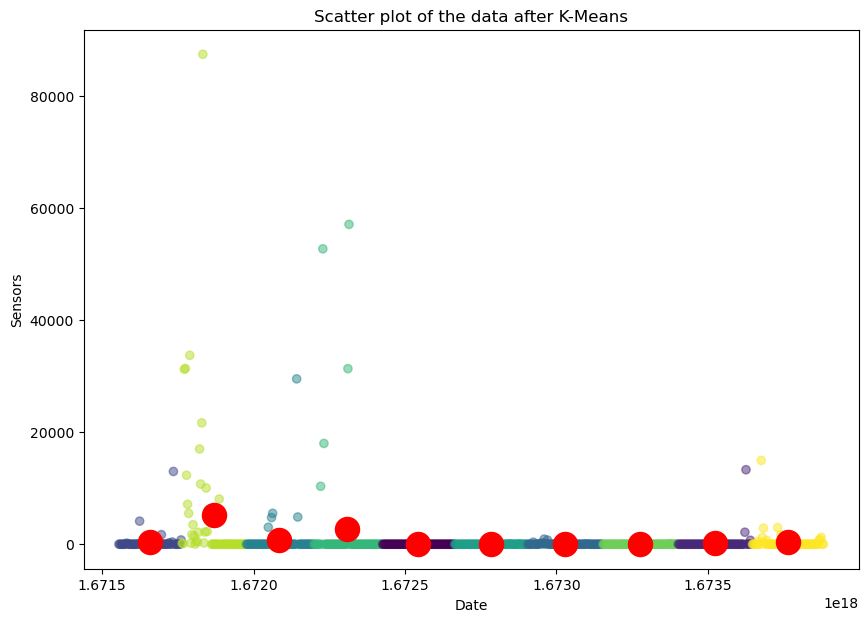

[1.02600003e+14 9.90000035e+13 9.54000008e+13 9.18000036e+13
 8.82000028e+13 8.46000047e+13 8.10000024e+13 7.73999954e+13
 7.37999950e+13 7.01999979e+13]


In [8]:
# k means clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_hourly)

# Predict the cluster labels: labels
labels = kmeans.predict(df_hourly)
# print(labels)

unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

plt.figure(figsize=(10,7))
plt.scatter(df_hourly['date'], df_hourly['Value'], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.title('Scatter plot of the data after K-Means')
plt.xlabel('Date')
plt.ylabel('Sensors')
plt.show()

# Compute the distances to the cluster centers
distances = kmeans.transform(df_hourly)

# Compute the anomaly score (distance to the closest centroid)
scores = distances.min(axis=1)

# Print the first 10 anomaly scores
print(scores[:10])



C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29048\4051798993.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Reds")


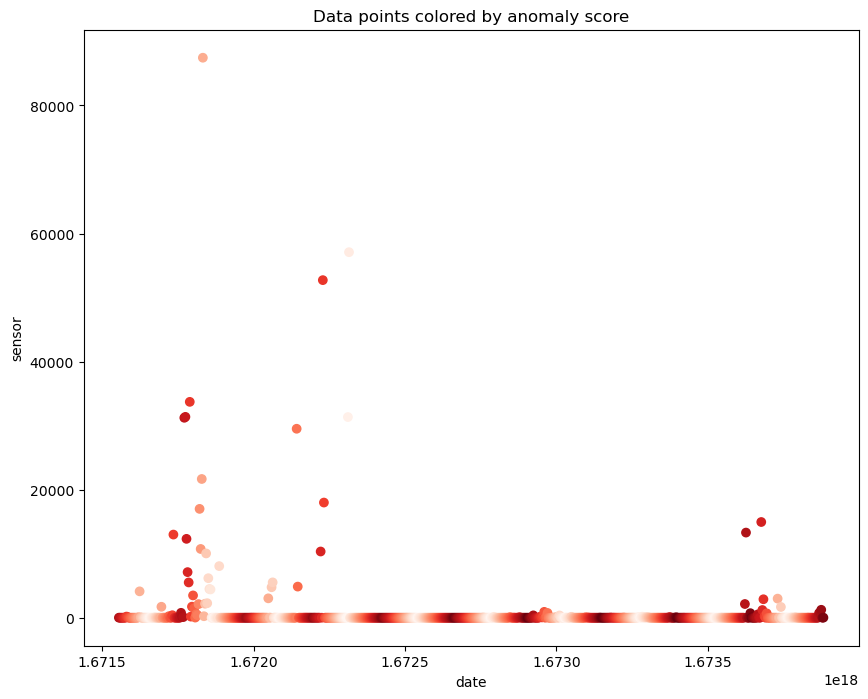

In [9]:
#Define the color map to convert scores to colors

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a color map that maps scores to colors
cmap = cm.get_cmap("Reds")

# Normalize the scores to the range [0, 1] for color mapping
normalized_scores = (scores-min(scores)) / (max(scores)-min(scores))

# Create a scatter plot of the PCA-transformed data with points colored by anomaly score
plt.figure(figsize=(10, 8))
plt.scatter(df_hourly['date'], df_hourly['Value'], c=cmap(normalized_scores))
# plt.colorbar(label='Anomaly score')
plt.xlabel('date')
plt.ylabel('sensor')
plt.title('Data points colored by anomaly score')
plt.show()

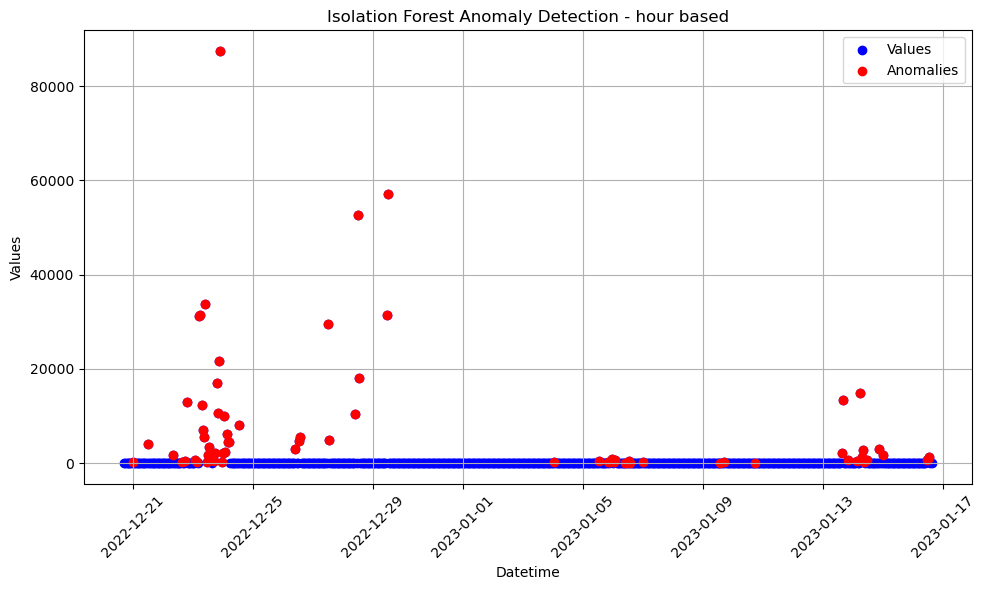

Total anomalies: 71, Percentage of anomalous values: 10.973724884080372%
                   date  Value  anomaly
0   2022-12-20 17:00:00    8.0        1
1   2022-12-20 18:00:00    0.0        1
2   2022-12-20 19:00:00    0.0        1
3   2022-12-20 20:00:00    0.0        1
4   2022-12-20 21:00:00    0.0        1
..                  ...    ...      ...
639 2023-01-16 08:00:00    1.0        1
640 2023-01-16 09:00:00    2.0        1
641 2023-01-16 10:00:00    5.0        1
645 2023-01-16 14:00:00    2.0        1
646 2023-01-16 15:00:00   15.0        1

[576 rows x 3 columns]


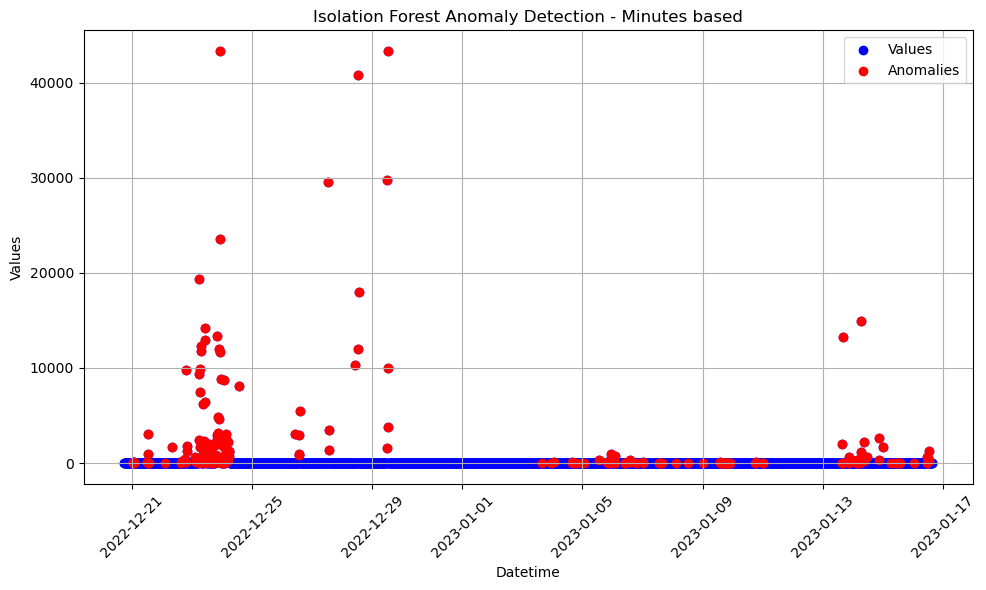

                    date  Value  anomaly
0    2022-12-20 17:30:00    4.0        1
1    2022-12-20 17:45:00    4.0        1
2    2022-12-20 18:00:00    0.0        1
3    2022-12-20 18:15:00    0.0        1
4    2022-12-20 18:30:00    0.0        1
...                  ...    ...      ...
2581 2023-01-16 14:45:00    1.0        1
2582 2023-01-16 15:00:00    7.0        1
2583 2023-01-16 15:15:00    0.0        1
2584 2023-01-16 15:30:00    4.0        1
2585 2023-01-16 15:45:00    4.0        1

[2373 rows x 3 columns]
Total anomalies: 213, Percentage of anomalous values: 8.236658932714617%


In [10]:
# isolation forest
from sklearn.ensemble import IsolationForest

df_hourly['date'] = pd.to_datetime(df_hourly['date'])

# Prepare data for IsolationForest
values = df_hourly[['Value']]  # Selecting the 'values' column as input for the model

# Initialize and fit the IsolationForest model
model = IsolationForest( random_state=42)
df_hourly['anomaly'] = model.fit_predict(values)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies = df_hourly[df_hourly['anomaly'] == -1]
regular = df_hourly[df_hourly['anomaly'] == 1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_hourly['date'], df_hourly['Value'], label='Values', color='blue')
plt.scatter(anomalies['date'], anomalies['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - hour based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
# print(anomalies)
# Calculate the percentage of values equal to -1
count_anomaly_h = (df_hourly['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_h = (count_anomaly_h / len(df_hourly)) * 100
print(f"Total anomalies: {count_anomaly_h}, Percentage of anomalous values: {percentage_h}%")
print(regular)

# anomalies by minutes
df_minute['date'] = pd.to_datetime(df_minute['date'])

# Prepare data for IsolationForest
values_m = df_minute[['Value']]  # Selecting the 'values' column as input for the model

df_minute['anomaly'] = model.fit_predict(values_m)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_m = df_minute[df_minute['anomaly'] == -1]
regular_m = df_minute[df_minute['anomaly'] == 1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_minute['date'], df_minute['Value'], label='Values', color='blue')
plt.scatter(anomalies_m['date'], anomalies_m['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - Minutes based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(regular_m)
# Calculate the percentage of values equal to -1
count_anomaly_m = (df_minute['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_m = (count_anomaly_m / len(df_minute)) * 100
print(f"Total anomalies: {count_anomaly_m}, Percentage of anomalous values: {percentage_m}%")


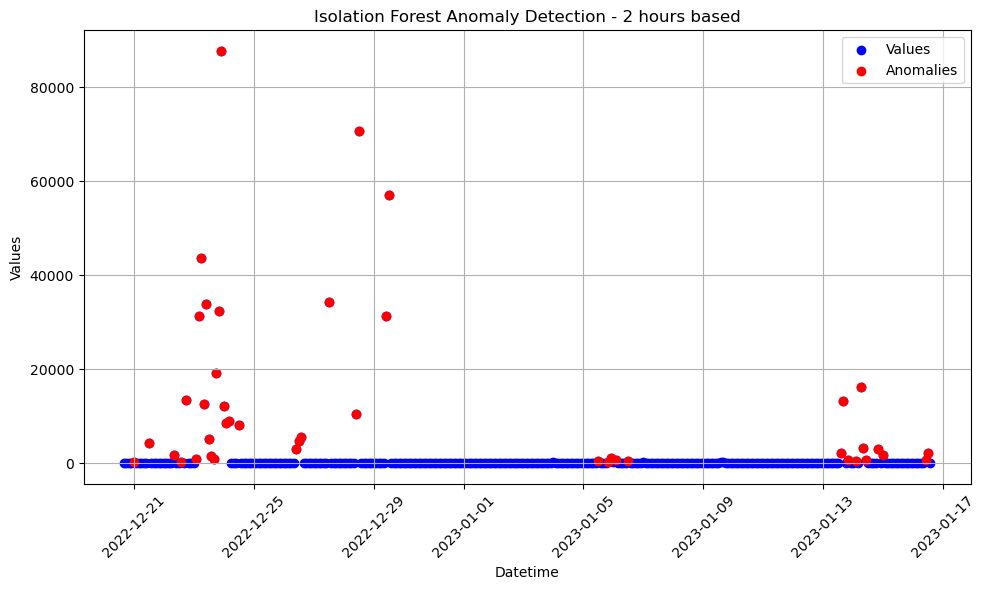

                   date  Value  anomaly
0   2022-12-20 16:00:00    8.0        1
1   2022-12-20 18:00:00    0.0        1
2   2022-12-20 20:00:00    0.0        1
3   2022-12-20 22:00:00    3.0        1
5   2022-12-21 02:00:00    0.0        1
..                  ...    ...      ...
317 2023-01-16 02:00:00    3.0        1
318 2023-01-16 04:00:00    2.0        1
319 2023-01-16 06:00:00    2.0        1
320 2023-01-16 08:00:00    3.0        1
323 2023-01-16 14:00:00   17.0        1

[280 rows x 3 columns]
Total anomalies: 44, Percentage of anomalous values: 13.580246913580247%


In [11]:
# anomalies by 2 hours
model = IsolationForest(contamination='auto', random_state=42)
df_2hours['date'] = pd.to_datetime(df_2hours['date'])

# Prepare data for IsolationForest
values_2h = df_2hours[['Value']]  # Selecting the 'values' column as input for the model

df_2hours['anomaly'] = model.fit_predict(values_2h)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_2h = df_2hours[df_2hours['anomaly'] == -1]
regular_2h = df_2hours[df_2hours['anomaly'] == 1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_2hours['date'], df_2hours['Value'], label='Values', color='blue')
plt.scatter(anomalies_2h['date'], anomalies_2h['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - 2 hours based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(regular_2h)
# Calculate the percentage of values equal to -1
count_anomaly_2h = (df_2hours['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_2h = (count_anomaly_2h / len(df_2hours)) * 100
print(f"Total anomalies: {count_anomaly_2h}, Percentage of anomalous values: {percentage_2h}%")

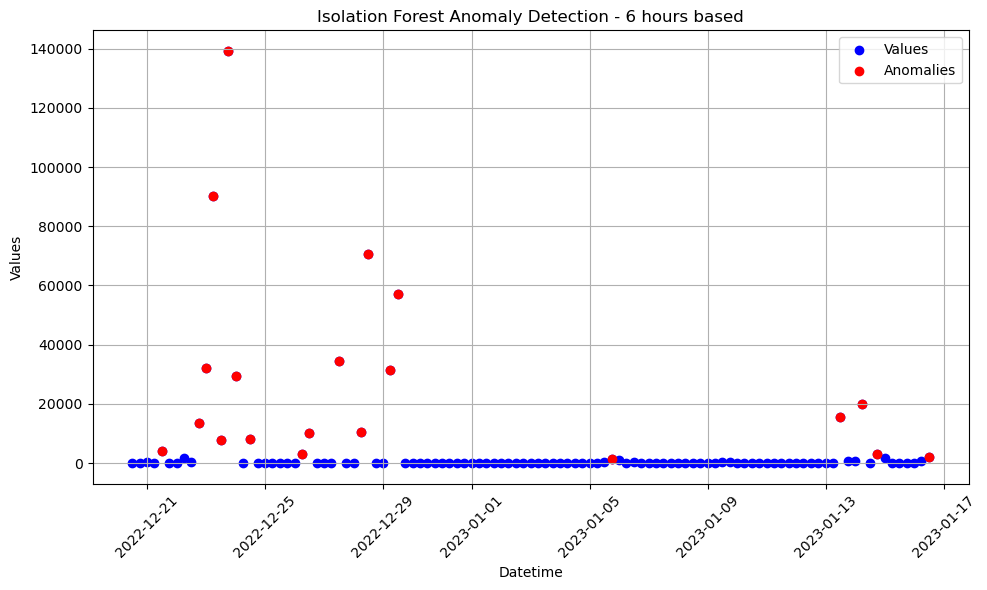

                   date     Value  anomaly
4   2022-12-21 12:00:00    4178.0       -1
9   2022-12-22 18:00:00   13396.0       -1
10  2022-12-23 00:00:00   32266.0       -1
11  2022-12-23 06:00:00   90210.0       -1
12  2022-12-23 12:00:00    7657.0       -1
13  2022-12-23 18:00:00  139216.0       -1
14  2022-12-24 00:00:00   29569.0       -1
16  2022-12-24 12:00:00    8063.0       -1
23  2022-12-26 06:00:00    3049.0       -1
24  2022-12-26 12:00:00   10302.0       -1
28  2022-12-27 12:00:00   34376.0       -1
31  2022-12-28 06:00:00   10355.0       -1
32  2022-12-28 12:00:00   70715.0       -1
35  2022-12-29 06:00:00   31338.0       -1
36  2022-12-29 12:00:00   57087.0       -1
65  2023-01-05 18:00:00    1433.0       -1
96  2023-01-13 12:00:00   15449.0       -1
99  2023-01-14 06:00:00   19954.0       -1
101 2023-01-14 18:00:00    2997.0       -1
108 2023-01-16 12:00:00    2093.0       -1
Total anomalies: 20, Percentage of anomalous values: 18.34862385321101%


In [12]:
# anomalies by 6 hours
model = IsolationForest(contamination='auto', random_state=42)
df_6hours['date'] = pd.to_datetime(df_6hours['date'])

# Prepare data for IsolationForest
values_6h = df_6hours[['Value']]  # Selecting the 'values' column as input for the model

df_6hours['anomaly'] = model.fit_predict(values_6h)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_6h = df_6hours[df_6hours['anomaly'] == -1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_6hours['date'], df_6hours['Value'], label='Values', color='blue')
plt.scatter(anomalies_6h['date'], anomalies_6h['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - 6 hours based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(anomalies_6h)
# Calculate the percentage of values equal to -1
count_anomaly_6h = (df_6hours['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_6h = (count_anomaly_6h / len(df_6hours)) * 100
print(f"Total anomalies: {count_anomaly_6h}, Percentage of anomalous values: {percentage_6h}%")

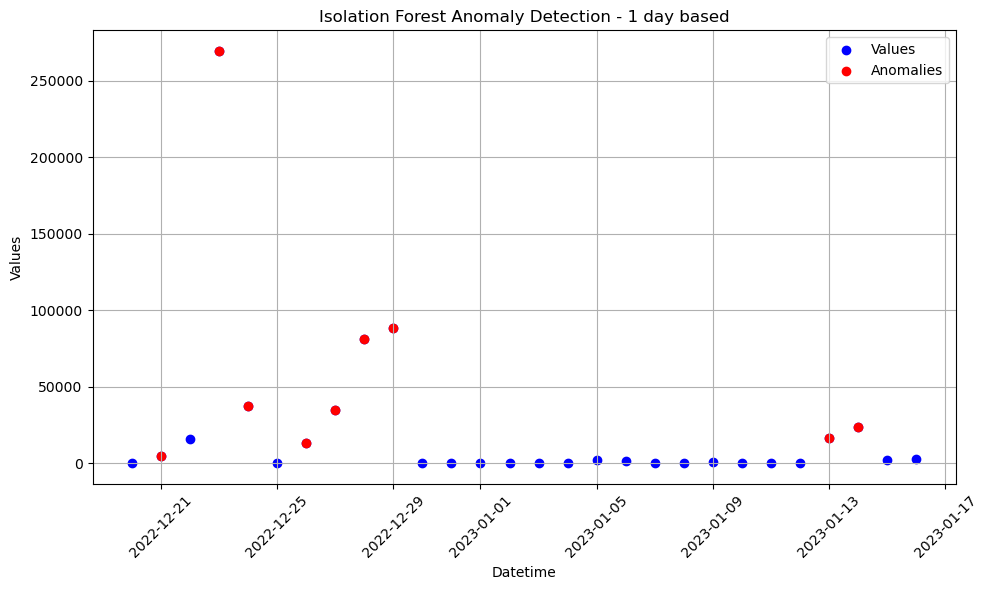

         date     Value  anomaly
1  2022-12-21    4562.0       -1
3  2022-12-23  269349.0       -1
4  2022-12-24   37639.0       -1
6  2022-12-26   13370.0       -1
7  2022-12-27   34416.0       -1
8  2022-12-28   81100.0       -1
9  2022-12-29   88433.0       -1
24 2023-01-13   16221.0       -1
25 2023-01-14   23515.0       -1
Total anomalies: 9, Percentage of anomalous values: 32.142857142857146%


In [13]:
# anomalies by 1 day
model = IsolationForest(contamination='auto', random_state=42)
df_day['date'] = pd.to_datetime(df_day['date'])

# Prepare data for IsolationForest
values_d = df_day[['Value']]  # Selecting the 'values' column as input for the model

df_day['anomaly'] = model.fit_predict(values_d)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_d = df_day[df_day['anomaly'] == -1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_day['date'], df_day['Value'], label='Values', color='blue')
plt.scatter(anomalies_d['date'], anomalies_d['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - 1 day based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(anomalies_d)
# Calculate the percentage of values equal to -1
count_anomaly_d = (df_day['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_d = (count_anomaly_d / len(df_day)) * 100
print(f"Total anomalies: {count_anomaly_d}, Percentage of anomalous values: {percentage_d}%")

In [14]:
# print(df.head(10))
regular_date = regular.set_index('date')
regular_idx = regular_date.index
# print(regular_idx)

# Filtering out the hourly anomalous data from the original data
filtered_df = df[df.index.floor('H').isin(regular_idx)].reset_index()

# filtered_df = df[df.index.floor('H')]
print(filtered_df.Sensor.unique(), df.Sensor.unique())



['bathroom_door' 'bathroom_button' 'bathroom_light' 'bedroom_light'
 'bedroom_button' 'kitchen_light' 'kitchen_motion' 'living_button'
 'living_light'] ['bathroom_door' 'bathroom_button' 'bathroom_light' 'bedroom_light'
 'bedroom_button' 'kitchen_light' 'kitchen_motion' 'living_button'
 'living_light']


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29048\3785284357.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  filtered_df = df[df.index.floor('H').isin(regular_idx)].reset_index()


In [15]:
regular_min_date = regular_m.set_index('date')
regular_min_idx = regular_min_date.index
# print(regular_idx)

# Filtering out the hourly anomalous data from the original data
filtered_df_min = df[df.index.floor('15min').isin(regular_min_idx)].reset_index()

# filtered_df = df[df.index.floor('H')]
print(filtered_df_min.Sensor.unique(), df.Sensor.unique())

['bathroom_door' 'bathroom_button' 'bathroom_light' 'bedroom_light'
 'bedroom_button' 'kitchen_light' 'kitchen_motion' 'living_button'
 'living_light'] ['bathroom_door' 'bathroom_button' 'bathroom_light' 'bedroom_light'
 'bedroom_button' 'kitchen_light' 'kitchen_motion' 'living_button'
 'living_light']


In [16]:
regular_2h_date = regular_2h.set_index('date')
regular_2h_idx = regular_2h_date.index
# print(regular_idx)

# Filtering out the hourly anomalous data from the original data
filtered_df_2h = df[df.index.floor('2h').isin(regular_2h_idx)].reset_index()

# filtered_df = df[df.index.floor('H')]
print(filtered_df_2h.Sensor.unique())

['bathroom_door' 'bathroom_button' 'bathroom_light' 'bedroom_light'
 'bedroom_button' 'kitchen_light' 'kitchen_motion' 'living_light']


In [17]:
from math import ceil


def get_adjMat_FNE(data):
    u = data.Sensor.unique()
    adjMatrix = pd.DataFrame(0.0, columns=u, index=u)
    prevRow = data.iloc[0]
    for _,curRow in data.iterrows():
        if (curRow.Sensor != prevRow.Sensor):
            t = max(ceil(curRow.seconds_since_epoch - prevRow.seconds_since_epoch), 1.0)
            # t = max(ceil((curRow.DateTime - prevRow.DateTime).total_seconds()),1.0)
            adjMatrix[prevRow.Sensor][curRow.Sensor] += 1/t
        prevRow = curRow
    
    return adjMatrix

def get_adjMat_TD(data):
    u = data.Sensor.unique()
    adjMatrix = pd.DataFrame(0.0, columns=u, index=u)
    curGroup = []
    th = 2
    prevRow = data.iloc[0]
    for _, curRow in data.iterrows():
        if ((curRow.seconds_since_epoch - prevRow.seconds_since_epoch) >= th):
            curGroup = []
        if not(curRow.Sensor in curGroup):
            curGroup.append(curRow.Sensor)
        for item in curGroup:
            adjMatrix[item][curRow.Sensor] += 1
        prevRow = curRow
    
    return adjMatrix

In [ ]:
## FNE TD and Grouping
from math import ceil
from sklearn.cluster import SpectralClustering
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

def get_adjMat_FNE(data):
    u = data.Sensor.unique()
    adjMatrix = pd.DataFrame(0.0, columns=u, index=u)
    prevRow = data.iloc[0]
    for _,curRow in data.iterrows():
        if (curRow.Sensor != prevRow.Sensor):
            t = max(ceil(curRow.seconds_since_epoch - prevRow.seconds_since_epoch), 1.0)
            # t = max(ceil((curRow.DateTime - prevRow.DateTime).total_seconds()),1.0)
            adjMatrix[prevRow.Sensor][curRow.Sensor] += 1/t
        prevRow = curRow
    
    return adjMatrix

def get_adjMat_TD(data):
    u = data.Sensor.unique()
    adjMatrix = pd.DataFrame(0.0, columns=u, index=u)
    curGroup = []
    th = 2
    prevRow = data.iloc[0]
    for _, curRow in data.iterrows():
        if ((curRow.seconds_since_epoch - prevRow.seconds_since_epoch) >= th):
            curGroup = []
        if not(curRow.Sensor in curGroup):
            curGroup.append(curRow.Sensor)
        for item in curGroup:
            adjMatrix[item][curRow.Sensor] += 1
        prevRow = curRow
    
    return adjMatrix

def normalize(df_adj):
    r=0
    norm = df_adj.copy()
    for index, row in norm.iterrows():
        mx = 0
        mn = 0
        c = 0
        for value in row:
            mx = max(mx, value)
            mn = min(mn, value)
            if not mx-mn == 0:
                norm.iloc[r,c] = (value-mn)/(mx-mn)
            c += 1
        r += 1
    return norm

def get_clusters_and_scores(adjMat, n_clusters):
    #normalize matrix
    adjMat = normalize(adjMat)
    sp = SpectralClustering(n_clusters,affinity="precomputed")
    clus = sp.fit_predict(adjMat)
    display(pd.DataFrame(clus,index=adjMat.index))

    embedding = SpectralEmbedding(n_components=2, affinity='precomputed')    
    features = embedding.fit_transform(adjMat)

    cluster_score_dict = {}
    ch_score = calinski_harabasz_score(features, clus)
    silhouette_avg = silhouette_score(features, clus)
    db_score = davies_bouldin_score(features, clus)

    cluster_score_dict['cluster_number'] = n_clusters
    cluster_score_dict['ch-score'] = ch_score
    cluster_score_dict['silhoutte-score'] = silhouette_avg
    cluster_score_dict['db-score'] = db_score
    cluster_score_dict['cluster'] = clus
    print(cluster_score_dict)
    return cluster_score_dict

In [49]:
#FNE and TD implementations SEREIN-M
from math import ceil
from sklearn.cluster import SpectralClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from neighbor_group import *
from sklearn.manifold import SpectralEmbedding

def frequent_next_event(df):
    u = df.Sensor.unique()
    adjacency_matrix = pd.DataFrame(0.0, columns=u, index=u)
    prev_row = df.iloc[0]
    for _,cur_row in df.iterrows():
        if (cur_row.Sensor != prev_row.Sensor):
            t = max(ceil(cur_row.seconds_since_epoch - prev_row.seconds_since_epoch), 1.0)
            # t = max(ceil((cur_row.DateTime - prev_row.DateTime).total_seconds()),1.0)
            adjacency_matrix[prev_row.Sensor][cur_row.Sensor] += 1/t
        prev_row = cur_row
    
    return adjacency_matrix

def time_delta(df, th=2):
    u = df.Sensor.unique()
    adjacency_matrix = pd.DataFrame(0.0, columns=u, index=u)
    cur_group = []
    prev_row = df.iloc[0]
    for _, cur_row in df.iterrows():
        if ((cur_row.seconds_since_epoch - prev_row.seconds_since_epoch) >= th):
            cur_group = []
        if not(cur_row.Sensor in cur_group):
            cur_group.append(cur_row.Sensor)
        for item in cur_group:
            adjacency_matrix[item][cur_row.Sensor] += 1
        prev_row = cur_row
    
    return adjacency_matrix

def normalize(df_adj):
    r=0
    norm = df_adj.copy()
    for index, row in norm.iterrows():
        mx = 0
        mn = 0
        c = 0
        for value in row:
            mx = max(mx, value)
            mn = min(mn, value)
            if not mx-mn == 0:
                norm.iloc[r,c] = (value-mn)/(mx-mn)
            c += 1
        r += 1
    return norm

def get_sensor_groups(adjacency_matrix, n_clusters=4):
    # Fixed cluster number
    
    max_ch = 0
    stop_iter = 10
    cluster_score_dict = {}
    patience = 0
    adjacency_matrix = normalize(adjacency_matrix)

    spectral_clustering = SpectralClustering(n_clusters, affinity="precomputed")
    cluster = spectral_clustering.fit_predict(adjacency_matrix)
    embedding = SpectralEmbedding(n_components=2, affinity='precomputed')
        
    features = embedding.fit_transform(adjacency_matrix)

    ch_score = calinski_harabasz_score(features, cluster)
    silhouette_avg = silhouette_score(features, cluster)
    db_score = davies_bouldin_score(features, cluster)

    cluster_score_dict['cluster_number'] = n_clusters
    cluster_score_dict['ch-score'] = ch_score
    cluster_score_dict['silhoutte-score'] = silhouette_avg
    cluster_score_dict['db-score'] = db_score
    cluster_score_dict['cluster'] = cluster
    print(cluster_score_dict)

    cluster_dict = get_cluster_sensor_list(cluster_score_dict['cluster'], adjacency_matrix)
    adjacency_matrix_list, unique_sensors = get_adjacency_matrix_list(cluster_dict, adjacency_matrix)

    # Get groups based on fixed nearest nodes
    sensor_group = {}
    sensor_number_each_group = 3  # Select the sensor numbers that will used to pick top nearest nodes
    i = 1 
    for index, matrix in enumerate(adjacency_matrix_list):
        groups = get_groups(matrix, sensor_number_each_group, unique_sensors[index])
        for group in groups:
            item_list = []
            for item in group:
                item_list.append(item)
            sensor_group['G'+ str(i)] = item_list
            i += 1

    # sensor_group_df = pd.DataFrame(sensor_group)
    # print(sensor_group)
    return cluster_score_dict

In [56]:
## FNE, TD original data serein-m
print('Frequent next event starts')
print('---------------------------')
fnq_adjacency_matrix = frequent_next_event(df_small)
print('---------------------------')
print('Frequent next event ends')

print('Time Delta starts')
print('---------------------------')
td_adjacency_matrix = time_delta(df_small)
print('---------------------------')
print('Time Delta ends')


fne_scores = get_sensor_groups(fnq_adjacency_matrix, n_clusters=4)

print("~~~ Time Delta results ~~~")

td_scores = get_sensor_groups(td_adjacency_matrix, n_clusters=4)

Frequent next event starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29876\3087019974.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.Sensor][cur_row.Sensor] += 1/t


---------------------------
Frequent next event ends
Time Delta starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29876\3087019974.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[item][cur_row.Sensor] += 1


---------------------------
Time Delta ends
{'cluster_number': 4, 'ch-score': 12.996981237532884, 'silhoutte-score': 0.4198902175994277, 'db-score': 0.44243082250832805, 'cluster': array([2, 2, 0, 0, 3, 3, 0, 1, 0])}
['bedroom_button', 'bedroom_light']
['kitchen_light', 'kitchen_motion', 'bathroom_door', 'bathroom_light']
['living_button', 'living_light']
['bathroom_button']
number of unique group  1
('bedroom_button', 'bedroom_light')
number of unique group  2
('bathroom_door', 'bathroom_light', 'kitchen_light')
('bathroom_door', 'kitchen_light', 'kitchen_motion')
number of unique group  1
('living_button', 'living_light')
number of unique group  1
('bathroom_button',)
~~~ Time Delta results ~~~
{'cluster_number': 4, 'ch-score': 25.07885876123484, 'silhoutte-score': 0.36784089908379997, 'db-score': 0.3733051769886078, 'cluster': array([1, 1, 2, 2, 2, 2, 3, 3, 0])}
['bedroom_button', 'bedroom_light']
['kitchen_light', 'kitchen_motion', 'living_button', 'living_light']
['bathroom_door',

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its 

In [18]:
## FNE for original data
# from math import ceil

# prevRow = df.iloc[0]
# for _,curRow in df.iterrows():
#     if (curRow.Sensor != prevRow.Sensor):
#         t = max(ceil(curRow.seconds_since_epoch - prevRow.seconds_since_epoch), 1.0)
#         # t = max(ceil((curRow.DateTime - prevRow.DateTime).total_seconds()),1.0)
#         adjMat[prevRow.Sensor][curRow.Sensor] += 1/t
#     prevRow = curRow

adjMat = get_adjMat_FNE(df)


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29048\1832266997.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[prevRow.Sensor][curRow.Sensor] += 1/t


In [19]:
## TD for original data
# curGroup = []
# th = 2
# prevRow = df.iloc[0]
# for _, curRow in df.iterrows():
#     if ((curRow.seconds_since_epoch - prevRow.seconds_since_epoch) >= th):
#         curGroup = []
#     if not(curRow.Sensor in curGroup):
#         curGroup.append(curRow.Sensor)
#     for item in curGroup:
#         adjMat2[item][curRow.Sensor] += 1
#     prevRow = curRow

adjMat2 = get_adjMat_TD(df)

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29048\1832266997.py:29: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1


In [20]:
from sklearn.cluster import SpectralClustering

sp = SpectralClustering(4,affinity="precomputed")
clus = sp.fit_predict(adjMat)

clus2 = sp.fit_predict(adjMat2)

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

In [21]:
display(pd.DataFrame(clus,index=adjMat.index))

display(pd.DataFrame(clus2,index=adjMat2.index))


,0
bathroom_door,0
bathroom_button,0
bathroom_light,0
bedroom_light,2
bedroom_button,2
kitchen_light,3
kitchen_motion,3
living_button,1
living_light,1


,0
bathroom_door,0
bathroom_button,0
bathroom_light,0
bedroom_light,2
bedroom_button,2
kitchen_light,3
kitchen_motion,3
living_button,1
living_light,1


In [22]:
## FNE for filtered data
# prevRow = filtered_df.iloc[0]
# for _,curRow in filtered_df.iterrows():
#     if (curRow.Sensor != prevRow.Sensor):
#         t = max(ceil(curRow.seconds_since_epoch - prevRow.seconds_since_epoch), 1.0)
#         # t = max(ceil((curRow.DateTime - prevRow.DateTime).total_seconds()),1.0)
#         adjMatFiltered[prevRow.Sensor][curRow.Sensor] += 1/t
#     prevRow = curRow

adjMatFiltered = get_adjMat_FNE(filtered_df)
adjMatMin = get_adjMat_FNE(filtered_df_min)


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29048\1832266997.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[prevRow.Sensor][curRow.Sensor] += 1/t
C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29048\1832266997.py:12: FutureW

In [23]:
sp3 = SpectralClustering(4,affinity="precomputed")
clus3 = sp3.fit_predict(adjMatFiltered)

display(pd.DataFrame(clus3,index=adjMatFiltered.index))

print(clus3)

clus_min = sp3.fit_predict(adjMatMin)

display(pd.DataFrame(clus_min,index=adjMatMin.index))

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,0
bathroom_door,0
bathroom_button,0
bathroom_light,0
bedroom_light,2
bedroom_button,2
kitchen_light,3
kitchen_motion,3
living_button,1
living_light,1


[0 0 0 2 2 3 3 1 1]


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,0
bathroom_door,0
bathroom_button,0
bathroom_light,0
bedroom_light,3
bedroom_button,3
kitchen_light,0
kitchen_motion,0
living_button,2
living_light,1


In [24]:
adjMat2h = get_adjMat_FNE(filtered_df_2h)
clus_2h = sp3.fit_predict(adjMat2h)

display(pd.DataFrame(clus_2h,index=adjMat2h.index))

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29048\1832266997.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[prevRow.Sensor][curRow.Sensor] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\

,0
bathroom_door,3
bathroom_button,3
bathroom_light,3
bedroom_light,2
bedroom_button,2
kitchen_light,0
kitchen_motion,0
living_light,1


In [25]:
### TD for filtered data
# curGroup = []
# th = 2
# prevRow = filtered_df.iloc[0]
# for _, curRow in filtered_df.iterrows():
#     if ((curRow.seconds_since_epoch - prevRow.seconds_since_epoch) >= th):
#         curGroup = []
#     if not(curRow.Sensor in curGroup):
#         curGroup.append(curRow.Sensor)
#     for item in curGroup:
#         adjMat4[item][curRow.Sensor] += 1
#     prevRow = curRow

adjMat4 = get_adjMat_TD(filtered_df)
sp4 = SpectralClustering(4,affinity="precomputed")
clus4 = sp4.fit_predict(adjMat4)

display(pd.DataFrame(clus4,index=adjMat4.index))

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29048\1832266997.py:29: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_em

,0
bathroom_door,0
bathroom_button,0
bathroom_light,0
bedroom_light,2
bedroom_button,2
kitchen_light,3
kitchen_motion,3
living_button,1
living_light,1


In [26]:
adjMatMinTD = get_adjMat_TD(filtered_df_min)
sp4 = SpectralClustering(4,affinity="precomputed")
clus_min_TD = sp4.fit_predict(adjMatMinTD)

display(pd.DataFrame(clus_min_TD,index=adjMatMinTD.index))

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29048\1832266997.py:29: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_em

,0
bathroom_door,3
bathroom_button,3
bathroom_light,3
bedroom_light,0
bedroom_button,0
kitchen_light,2
kitchen_motion,2
living_button,2
living_light,1


In [27]:
def normalize(df_adj):
    r=0
    norm = df_adj.copy()
    for index, row in norm.iterrows():
        mx = 0
        mn = 0
        c = 0
        for value in row:
            mx = max(mx, value)
            mn = min(mn, value)
            if not mx-mn == 0:
                norm.iloc[r,c] = (value-mn)/(mx-mn)
            c += 1
        r += 1
    return norm


norm_adjMat = normalize(adjMat)
norm_adjMat2 = normalize(adjMat2)
norm_adjMatFiltered = normalize(adjMatFiltered)
norm_adjMat4 = normalize(adjMat4)

In [28]:
from sklearn.manifold import SpectralEmbedding
 
 
embedding = SpectralEmbedding(n_components=2, affinity='precomputed')
        
features = embedding.fit_transform(adjMat)
features2 = embedding.fit_transform(adjMat2)
featuresFiltered = embedding.fit_transform(adjMatFiltered)
features4 = embedding.fit_transform(adjMat4)
featuresMin = embedding.fit_transform(adjMatMin)

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\U

In [29]:
features_norm = embedding.fit_transform(norm_adjMat)
features2_norm = embedding.fit_transform(norm_adjMat2)
featuresFiltered_norm = embedding.fit_transform(norm_adjMatFiltered)
features4_norm = embedding.fit_transform(norm_adjMat4)

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


In [30]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

ch_score = calinski_harabasz_score(adjMat, clus)
print(f"Calinski-Harabasz Score FNE: {ch_score}")

silhouette_avg = silhouette_score(adjMat, clus)
print(f"Silhouette Score FNE: {silhouette_avg}")

# Calculate Davies-Bouldin score
db_score = davies_bouldin_score(adjMat, clus)
print(f"Davies-Bouldin Score FNE: {db_score}")

ch_score_td = calinski_harabasz_score(adjMat2, clus2)
print(f"Calinski-Harabasz Score TD: {ch_score_td}")

silhouette_avg_td = silhouette_score(adjMat2, clus2)
print(f"Silhouette Score TD: {silhouette_avg_td}")

# Calculate Davies-Bouldin score
db_score2 = davies_bouldin_score(adjMat2, clus2)
print(f"Davies-Bouldin Score TD: {db_score2}")

ch_score_3 = calinski_harabasz_score(adjMatFiltered, clus3)
print(f"Calinski-Harabasz Score FNE filtered: {ch_score_3}")

silhouette_avg_3 = silhouette_score(adjMatFiltered, clus3)
print(f"Silhouette Score FNE filtered: {silhouette_avg_3}")

# Calculate Davies-Bouldin score
db_score3 = davies_bouldin_score(adjMatFiltered, clus3)
print(f"Davies-Bouldin Score FNE filtered: {db_score3}")


ch_score_4 = calinski_harabasz_score(adjMat4, clus4)
print(f"Calinski-Harabasz Score TD filtered: {ch_score_4}")

silhouette_avg_4 = silhouette_score(adjMat4, clus4)
print(f"Silhouette Score TD filtered: {silhouette_avg_4}")

# Calculate Davies-Bouldin score
db_score4 = davies_bouldin_score(adjMat4, clus4)
print(f"Davies-Bouldin Score TD Filtered: {db_score4}")

Calinski-Harabasz Score FNE: 1.2970153085560592
Silhouette Score FNE: -0.10651129175710748
Davies-Bouldin Score FNE: 1.1832191199346855
Calinski-Harabasz Score TD: 1.081555206297452
Silhouette Score TD: -0.31243299188818086
Davies-Bouldin Score TD: 1.3741923419291324
Calinski-Harabasz Score FNE filtered: 1.2973429678287751
Silhouette Score FNE filtered: -0.1560818297575156
Davies-Bouldin Score FNE filtered: 1.2301477677263857
Calinski-Harabasz Score TD filtered: 2.3730583964015106
Silhouette Score TD filtered: -0.05440056365276177
Davies-Bouldin Score TD Filtered: 1.1865204523147785


In [ ]:
## Using spectral embedding
ch_score = calinski_harabasz_score(features, clus)
print(f"Calinski-Harabasz Score FNE: {ch_score}")

silhouette_avg = silhouette_score(features, clus)
print(f"Silhouette Score FNE: {silhouette_avg}")

# Calculate Davies-Bouldin score
db_score = davies_bouldin_score(features, clus)
print(f"Davies-Bouldin Score FNE: {db_score}")

ch_score_td = calinski_harabasz_score(features2, clus2)
print(f"Calinski-Harabasz Score TD: {ch_score_td}")

silhouette_avg_td = silhouette_score(features2, clus2)
print(f"Silhouette Score TD: {silhouette_avg_td}")

# Calculate Davies-Bouldin score
db_score2 = davies_bouldin_score(features2, clus2)
print(f"Davies-Bouldin Score TD: {db_score2}")

ch_score_3 = calinski_harabasz_score(featuresFiltered, clus3)
print(f"Calinski-Harabasz Score FNE filtered: {ch_score_3}")

silhouette_avg_3 = silhouette_score(featuresFiltered, clus3)
print(f"Silhouette Score FNE filtered: {silhouette_avg_3}")

# Calculate Davies-Bouldin score
db_score3 = davies_bouldin_score(featuresFiltered, clus3)
print(f"Davies-Bouldin Score FNE filtered: {db_score3}")


ch_score_4 = calinski_harabasz_score(features4, clus4)
print(f"Calinski-Harabasz Score TD filtered: {ch_score_4}")

silhouette_avg_4 = silhouette_score(features4, clus4)
print(f"Silhouette Score TD filtered: {silhouette_avg_4}")

# Calculate Davies-Bouldin score
db_score4 = davies_bouldin_score(features4, clus4)
print(f"Davies-Bouldin Score TD Filtered: {db_score4}")

ch_score_min = calinski_harabasz_score(featuresMin, clus_min)
print(f"Calinski-Harabasz Score FNE min filtered: {ch_score_min}")

silhouette_avg_min = silhouette_score(featuresMin, clus_min)
print(f"Silhouette Score FNE min filtered: {silhouette_avg_min}")

# Calculate Davies-Bouldin score
db_score_min = davies_bouldin_score(featuresMin, clus_min)
print(f"Davies-Bouldin Score FNE min filtered: {db_score_min}")

Calinski-Harabasz Score FNE: 13545.243828349778
Silhouette Score FNE: 0.9864221936577154
Davies-Bouldin Score FNE: 0.013921274426663448
Calinski-Harabasz Score TD: 501249.9809193884
Silhouette Score TD: 0.9824140934954168
Davies-Bouldin Score TD: 0.019450522385271767
Calinski-Harabasz Score FNE filtered: 7513.364522328642
Silhouette Score FNE filtered: 0.9917291008630821
Davies-Bouldin Score FNE filtered: 0.013832807502590595
Calinski-Harabasz Score TD filtered: 21358.84295999751
Silhouette Score TD filtered: 0.9861585987164223
Davies-Bouldin Score TD Filtered: 0.01437695059287777
Calinski-Harabasz Score FNE min filtered: 29.51663628689482
Silhouette Score FNE min filtered: 0.13631874208551795
Davies-Bouldin Score FNE min filtered: 0.6470091995366324


In [32]:
perc_silhoutte_FNE = (silhouette_avg_3 - silhouette_avg)/silhouette_avg *100
perc_silhoutte_TD = (silhouette_avg_4 - silhouette_avg_td)/silhouette_avg_td *100

print(perc_silhoutte_FNE, perc_silhoutte_TD)

0.5379955195136369 0.3811534510547029


In [33]:
## after normalization

## Fixed scores
ch_score_norm = calinski_harabasz_score(features_norm, clus)
print(f"Calinski-Harabasz Score FNE: {ch_score_norm}")

silhouette_avg_norm = silhouette_score(features_norm, clus)
print(f"Silhouette Score FNE: {silhouette_avg_norm}")

# Calculate Davies-Bouldin score
db_score_norm = davies_bouldin_score(features_norm, clus)
print(f"Davies-Bouldin Score FNE: {db_score_norm}")

ch_score_td_norm = calinski_harabasz_score(features2_norm, clus2)
print(f"Calinski-Harabasz Score TD: {ch_score_td_norm}")

silhouette_avg_td_norm = silhouette_score(features2_norm, clus2)
print(f"Silhouette Score TD: {silhouette_avg_td_norm}")

# Calculate Davies-Bouldin score
db_score_td_norm = davies_bouldin_score(features2_norm, clus2)
print(f"Davies-Bouldin Score TD: {db_score_td_norm}")

ch_score_3_norm = calinski_harabasz_score(featuresFiltered_norm, clus3)
print(f"Calinski-Harabasz Score FNE filtered: {ch_score_3_norm}")

silhouette_avg_3_norm = silhouette_score(featuresFiltered_norm, clus3)
print(f"Silhouette Score FNE filtered: {silhouette_avg_3_norm}")

# Calculate Davies-Bouldin score
db_score3_norm = davies_bouldin_score(featuresFiltered_norm, clus3)
print(f"Davies-Bouldin Score FNE filtered: {db_score3_norm}")


ch_score_4_norm = calinski_harabasz_score(features4_norm, clus4)
print(f"Calinski-Harabasz Score TD filtered: {ch_score_4_norm}")

silhouette_avg_4_norm = silhouette_score(features4_norm, clus4)
print(f"Silhouette Score TD filtered: {silhouette_avg_4_norm}")

# Calculate Davies-Bouldin score
db_score4_norm = davies_bouldin_score(features4_norm, clus4)
print(f"Davies-Bouldin Score TD Filtered: {db_score4_norm}")

Calinski-Harabasz Score FNE: 74.2255797395344
Silhouette Score FNE: 0.7454003779613183
Davies-Bouldin Score FNE: 0.3160832085307562
Calinski-Harabasz Score TD: 30.004602732589532
Silhouette Score TD: 0.547255934551392
Davies-Bouldin Score TD: 0.4522063099008049
Calinski-Harabasz Score FNE filtered: 73.56211604924769
Silhouette Score FNE filtered: 0.7448969154133531
Davies-Bouldin Score FNE filtered: 0.3163522008747221
Calinski-Harabasz Score TD filtered: 32.97253458755265
Silhouette Score TD filtered: 0.6793794657048308
Davies-Bouldin Score TD Filtered: 0.28579285480391803


In [17]:
##dummy for quick plotting
## Fixed scores
ch_score_norm = 74.2255797395344
print(f"Calinski-Harabasz Score FNE: {ch_score_norm}")

silhouette_avg_norm = 0.7454003779613183
print(f"Silhouette Score FNE: {silhouette_avg_norm}")

# Calculate Davies-Bouldin score
db_score_norm = 0.3160832085307562
print(f"Davies-Bouldin Score FNE: {db_score_norm}")

ch_score_td_norm = 30.004602732589532
print(f"Calinski-Harabasz Score TD: {ch_score_td_norm}")

silhouette_avg_td_norm = 0.547255934551392
print(f"Silhouette Score TD: {silhouette_avg_td_norm}")

# Calculate Davies-Bouldin score
db_score_td_norm = 0.4522063099008049
print(f"Davies-Bouldin Score TD: {db_score_td_norm}")

ch_score_3_norm = 73.56211604924769
print(f"Calinski-Harabasz Score FNE filtered: {ch_score_3_norm}")

silhouette_avg_3_norm = 0.7448969154133531
print(f"Silhouette Score FNE filtered: {silhouette_avg_3_norm}")

# Calculate Davies-Bouldin score
db_score3_norm = 0.3163522008747221
print(f"Davies-Bouldin Score FNE filtered: {db_score3_norm}")


ch_score_4_norm = 32.97253458755265
print(f"Calinski-Harabasz Score TD filtered: {ch_score_4_norm}")

silhouette_avg_4_norm = 0.6793794657048308
print(f"Silhouette Score TD filtered: {silhouette_avg_4_norm}")

# Calculate Davies-Bouldin score
db_score4_norm = 0.28579285480391803
print(f"Davies-Bouldin Score TD Filtered: {db_score4_norm}")

Calinski-Harabasz Score FNE: 74.2255797395344
Silhouette Score FNE: 0.7454003779613183
Davies-Bouldin Score FNE: 0.3160832085307562
Calinski-Harabasz Score TD: 30.004602732589532
Silhouette Score TD: 0.547255934551392
Davies-Bouldin Score TD: 0.4522063099008049
Calinski-Harabasz Score FNE filtered: 73.56211604924769
Silhouette Score FNE filtered: 0.7448969154133531
Davies-Bouldin Score FNE filtered: 0.3163522008747221
Calinski-Harabasz Score TD filtered: 32.97253458755265
Silhouette Score TD filtered: 0.6793794657048308
Davies-Bouldin Score TD Filtered: 0.28579285480391803


In [19]:
#[ch_score_norm, ch_score_td_norm], filteredScores= [ch_score_3_norm, ch_score_4_norm]
perc_CH_TD = (ch_score_4_norm - ch_score_td_norm)/ch_score_td_norm *100
perc_SH_TD = (silhouette_avg_4_norm - silhouette_avg_td_norm)/silhouette_avg_norm *100
perc_DB_TD = (db_score4_norm - db_score_td_norm)/ db_score_norm *100

print(perc_CH_TD, perc_SH_TD, perc_DB_TD)

9.891588571974316 17.72517630253941 -52.64862245306339


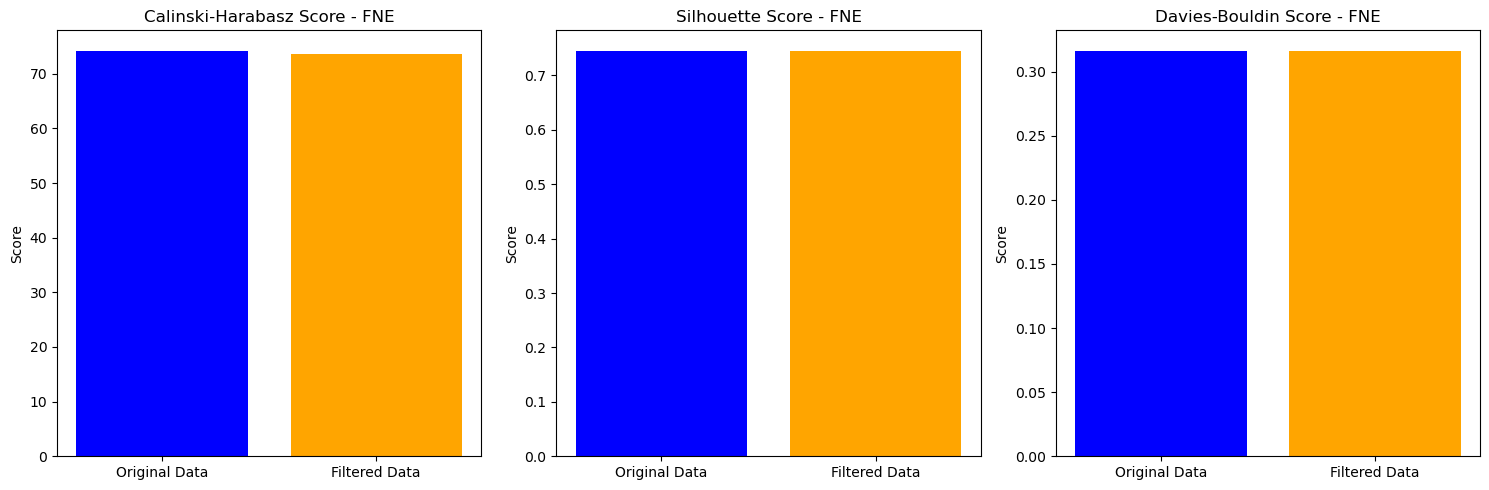

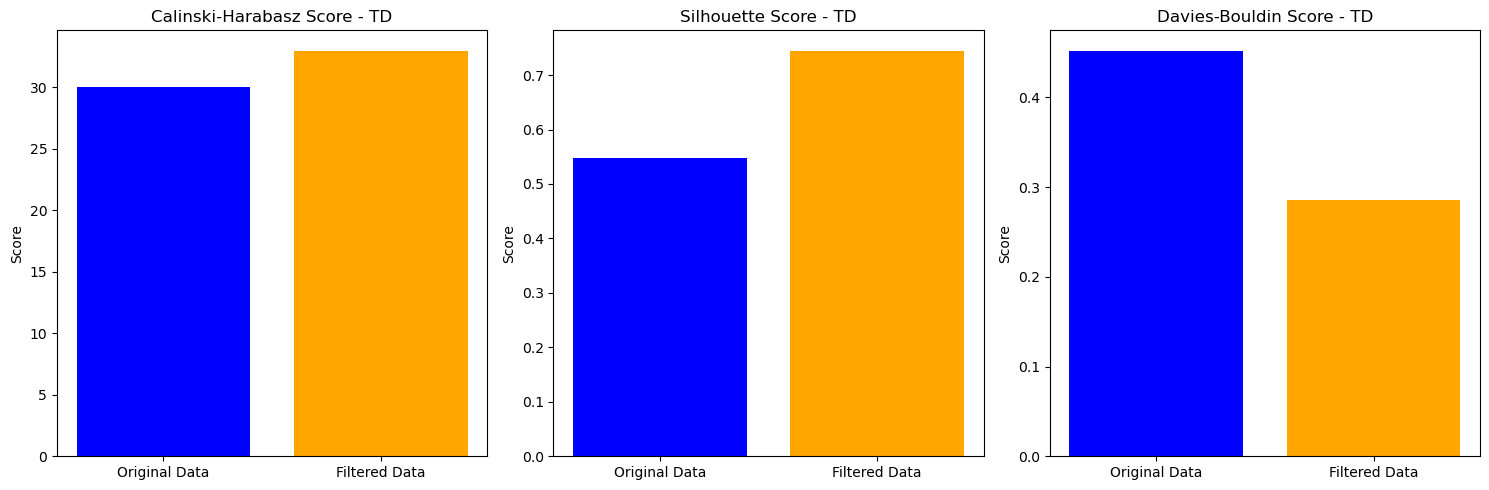

In [3]:
# Plotting each score for regular and filtered data

datasets = ['Original Data', 'Filtered Data']
ch_scores = [ch_score_norm, ch_score_3_norm]
sil_scores = [silhouette_avg_norm, silhouette_avg_3_norm]
db_scores = [db_score_norm, db_score3_norm]

# Plotting the bar plots for each metric
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot CH Score
axs[0].bar(datasets, ch_scores, color=['blue', 'orange'])
axs[0].set_title("Calinski-Harabasz Score - FNE")
axs[0].set_ylabel("Score")

# Plot Silhouette Score
axs[1].bar(datasets, sil_scores, color=['blue', 'orange'])
axs[1].set_title("Silhouette Score - FNE")
axs[1].set_ylabel("Score")

# Plot Davies-Bouldin Score
axs[2].bar(datasets, db_scores, color=['blue', 'orange'])
axs[2].set_title("Davies-Bouldin Score - FNE")
axs[2].set_ylabel("Score")

plt.tight_layout()
plt.show()

# Prepare data for bar plot
ch_scores_TD = [ch_score_td_norm, ch_score_4_norm]
sil_scores_TD = [silhouette_avg_td_norm, silhouette_avg_3_norm]
db_scores_TD = [db_score_td_norm, db_score4_norm]

# Plotting the bar plots for each metric
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot CH Score
axs[0].bar(datasets, ch_scores_TD, color=['blue', 'orange'])
axs[0].set_title("Calinski-Harabasz Score - TD")
axs[0].set_ylabel("Score")

# Plot Silhouette Score
axs[1].bar(datasets, sil_scores_TD, color=['blue', 'orange'])
axs[1].set_title("Silhouette Score - TD")
axs[1].set_ylabel("Score")

# Plot Davies-Bouldin Score
axs[2].bar(datasets, db_scores_TD, color=['blue', 'orange'])
axs[2].set_title("Davies-Bouldin Score - TD")
axs[2].set_ylabel("Score")

plt.tight_layout()
plt.show()

[0.547255934551392, 0.6793794657048308]


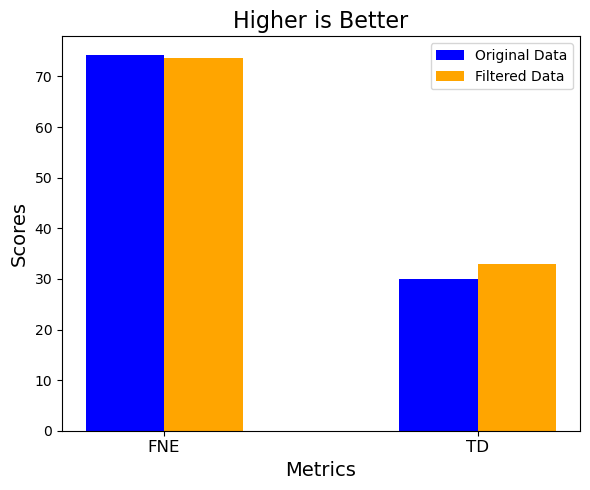

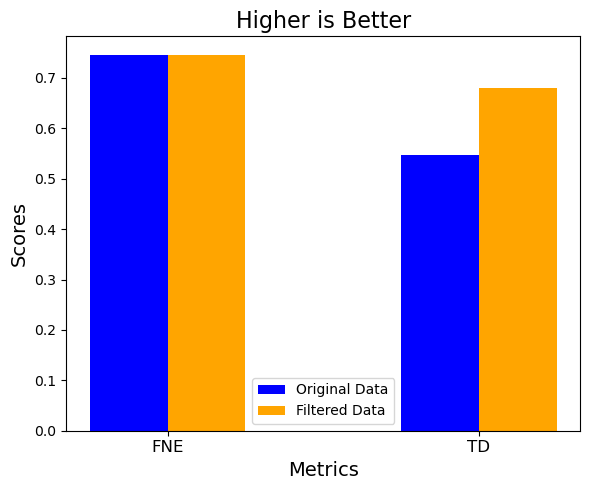

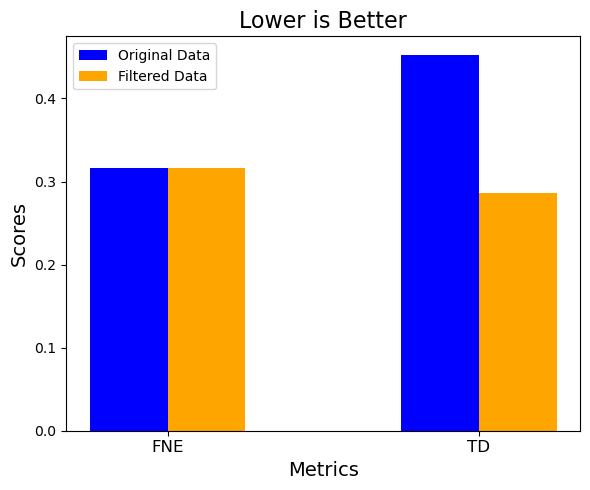

In [16]:
## Plots for comparing FNE and TD results
import numpy as np
def get_scores_plots(metrics, originalScores, filteredScores, title = 'Comparison of different Scores of Two Datasets for Two Algorithms'):
    # Set up the bar plot
    x = np.arange(2)  # label locations
    width = 0.25  # width of the bars

    fig, ax = plt.subplots(figsize=(6, 5))

    # Plot bars for each dataset
    bars1 = ax.bar(x - width/2, originalScores, width, label='Original Data', color='blue')
    bars2 = ax.bar(x + width/2, filteredScores, width, label='Filtered Data', color='orange')

    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('Metrics', fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)
    ax.set_title(title,  fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(["FNE", "TD"], fontsize=12)
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.savefig(f"{metrics}.png", dpi=300)
    plt.show()

print([silhouette_avg_td_norm, silhouette_avg_4_norm])
get_scores_plots(metrics = "./Plots/Sam_plots/Sam-CH", originalScores= [ch_score_norm, ch_score_td_norm], filteredScores= [ch_score_3_norm, ch_score_4_norm], title= 'Higher is Better')
get_scores_plots(metrics = "./Plots/Sam_plots/Sam-SH", originalScores= [silhouette_avg_norm, silhouette_avg_td_norm], filteredScores= [silhouette_avg_3_norm, silhouette_avg_4_norm], title= 'Higher is Better')
get_scores_plots(metrics = "./Plots/Sam_plots/Sam-DB", originalScores= [db_score_norm, db_score_td_norm], filteredScores= [db_score3_norm, db_score4_norm], title= 'Lower is Better')


In [20]:
from sklearn.ensemble import IsolationForest

def anomaly_detection_and_removal(df, timeWindow = 'h'):
    df['date'] = pd.to_datetime(df['Timestamp']) #convert the Timestamp to datetime
    df = df.set_index('date') #make the date column as index
    df_hourly = df.Value.resample(timeWindow).sum() #resample on hourly basis and get summary of sensor values on that hour.

    # df_hourly.columns = ['date', 'values']
    df_hourly = df_hourly.reset_index()
    
    values = df_hourly[['Value']]  # Selecting the 'values' column as input for the model

    # Initialize and fit the IsolationForest model
    model = IsolationForest( random_state=42)
    df_hourly['anomaly'] = model.fit_predict(values)

    # Isolation Forest outputs:
    # -1 for anomalies
    #  1 for normal data points

    # Filter the anomalies
    # anomalies = df_hourly[df_hourly['anomaly'] == -1]
    regular = df_hourly[df_hourly['anomaly'] == 1]
    

    regular_date = regular.set_index('date')
    regular_idx = regular_date.index
    # print(regular_idx)

    # Filtering out the hourly anomalous data from the original data
    filtered_df = df[df.index.floor(timeWindow).isin(regular_idx)].reset_index()

    # filtered_df = df[df.index.floor('H')]
    # print(filtered_df.Sensor.unique(), df.Sensor.unique())
    return filtered_df

In [57]:
## FNE, TD filtered data serein-m
df_filtered = anomaly_detection_and_removal(df_small, '1h')
print('Frequent next event starts')
print('---------------------------')
fnq_adjacency_matrix_filtered = frequent_next_event(df_filtered)
print('---------------------------')
print('Frequent next event ends')

print('Time Delta starts')
print('---------------------------')
td_adjacency_matrix_filtered = time_delta(df_filtered)
print('---------------------------')
print('Time Delta ends')


fne_scores_filtered = get_sensor_groups(fnq_adjacency_matrix_filtered, n_clusters=4)

print("~~~ Time Delta results ~~~")

td_scores_filtred = get_sensor_groups(td_adjacency_matrix_filtered, n_clusters=4)

Frequent next event starts
---------------------------
---------------------------
Frequent next event ends
Time Delta starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29876\3087019974.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.Sensor][cur_row.Sensor] += 1/t
C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29876\3087019974.py:32

---------------------------
Time Delta ends
{'cluster_number': 4, 'ch-score': 12.639619147311873, 'silhoutte-score': 0.4087537220699875, 'db-score': 0.3245658109517483, 'cluster': array([0, 0, 1, 1, 3, 0, 2, 0])}
['kitchen_light', 'kitchen_motion', 'bathroom_door', 'bathroom_light']
['bedroom_light', 'bedroom_button']
['living_light']
['bathroom_button']
number of unique group  2
('bathroom_door', 'bathroom_light', 'kitchen_light')
('bathroom_door', 'kitchen_light', 'kitchen_motion')
number of unique group  1
('bedroom_button', 'bedroom_light')
number of unique group  1
('living_light',)
number of unique group  1
('bathroom_button',)
~~~ Time Delta results ~~~
{'cluster_number': 4, 'ch-score': 12.938359049943914, 'silhoutte-score': 0.287011051770154, 'db-score': 0.41317010646357144, 'cluster': array([0, 0, 2, 2, 0, 1, 1, 3])}
['kitchen_light', 'kitchen_motion', 'living_light']
['bedroom_light', 'bedroom_button']
['bathroom_door', 'bathroom_button']
['bathroom_light']
number of unique g

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its 

In [37]:
fd = anomaly_detection_and_removal(df, timeWindow='1h')
print('Frequent next event starts')
print('---------------------------')
fnq_adjacency_matrix_filtered = get_adjMat_FNE(fd)
print('---------------------------')
print('Frequent next event ends')

print('Time Delta starts')
print('---------------------------')
td_adjacency_matrix_filtered = get_adjMat_TD(fd)
print('---------------------------')
print('Time Delta ends')


fne_scores_filtered_old_method = get_clusters_and_scores(fnq_adjacency_matrix_filtered, n_clusters=4)

print("~~~ Time Delta results ~~~")

td_scores_filtered_old_method = get_clusters_and_scores(td_adjacency_matrix_filtered, n_clusters=4)

Frequent next event starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28356\319371477.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[prevRow.Sensor][curRow.Sensor] += 1/t


---------------------------
Frequent next event ends
Time Delta starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28356\319371477.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1


---------------------------
Time Delta ends


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,0
bathroom_door,1
bathroom_button,1
bathroom_light,1
bedroom_light,2
bedroom_button,2
kitchen_light,3
kitchen_motion,3
living_button,0
living_light,0


{'cluster_number': 4, 'ch-score': 73.56211604924752, 'silhoutte-score': 0.7448969145112213, 'db-score': 0.3163522008747227, 'cluster': array([1, 1, 1, 2, 2, 3, 3, 0, 0])}
~~~ Time Delta results ~~~


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,0
bathroom_door,2
bathroom_button,2
bathroom_light,2
bedroom_light,0
bedroom_button,3
kitchen_light,0
kitchen_motion,0
living_button,1
living_light,1


{'cluster_number': 4, 'ch-score': 22.529138469071217, 'silhoutte-score': 0.5254101768415279, 'db-score': 0.39087979073431306, 'cluster': array([2, 2, 2, 0, 3, 0, 0, 1, 1])}


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


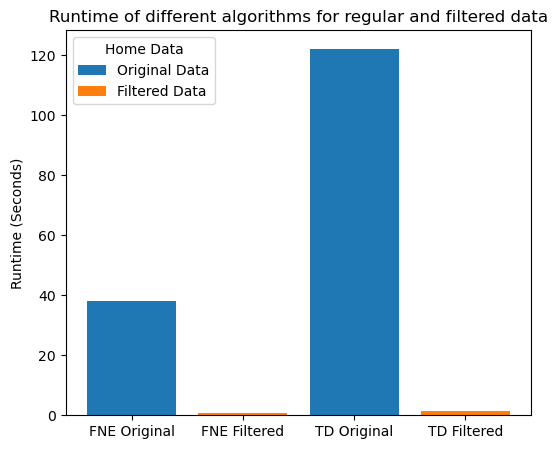

In [20]:
# import timeit

# runtime_FNE = timeit.timeit(lambda: get_adjMat_FNE(df), number=1000) / 1000
# runtime_TD = timeit.timeit(lambda: get_adjMat_TD(df), number=1000) / 1000

# runtime_FNE_filtered = timeit.timeit(lambda: get_adjMat_FNE(filtered_df), number=1000) / 1000
# runtime_TD_filtered = timeit.timeit(lambda: get_adjMat_TD(filtered_df), number=1000) / 1000

# print(runtime_FNE, runtime_TD, runtime_FNE_filtered, runtime_TD_filtered)

import time

runtimes = []
functions = ['FNE Original', 'FNE Filtered', 'TD Original', 'TD Filtered']

# # Runtime for FNE original data
# start_time = time.time()
# get_adjMat_FNE(df)
# end_time = time.time()

# runtime1 = end_time - start_time
# runtimes.append(runtime1)

# # Runtime for FNE filtered data
# start_time = time.time()
# fd = anomaly_detection_and_removal(df, 'h')
# get_adjMat_FNE(fd)
# end_time = time.time()

# runtime2 = end_time - start_time
# runtimes.append(runtime2)

# # Runtime for TD original Data
# start_time = time.time()
# get_adjMat_TD(df)
# end_time = time.time()

# runtime3 = end_time - start_time
# runtimes.append(runtime3)

# # Runtime for TD filtered data
# start_time = time.time()
# fd = anomaly_detection_and_removal(df, 'h')
# get_adjMat_TD(fd)
# end_time = time.time()

# # runtime4 = end_time - start_time
# # runtimes.append(runtime4)

# # print(runtimes)

runtimes = [38.0515501499176, 0.8677263259887695, 122.18998098373413, 1.2994935512542725]

fig, ax = plt.subplots(figsize=(6, 5))
bar_labels = ['Original Data', 'Filtered Data', '_Original Data', '_Filtered Data']
bar_colors = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange']

ax.bar(functions, runtimes, label=bar_labels, color=bar_colors)

ax.set_ylabel('Runtime (Seconds)')
ax.set_title('Runtime of different algorithms for regular and filtered data')
ax.legend(title='Home Data')

plt.show()

In [45]:
## Anomaly detection just based on the values - traditional method

df_small['date'] = pd.to_datetime(df_small['Timestamp']) #convert the Timestamp to datetime
df_small = df_small.set_index('date')
# Combine duplicates into lists
df_combined = df_small.groupby(["date", "Sensor"])["Value"].apply(list).reset_index()

# Pivot the data
pivoted_df = df_combined.pivot(index="date", columns="Sensor", values="Value")

# Reset column names for better readability (optional)
pivoted_df.columns.name = None
pivoted_df.reset_index(inplace=True)

# Replace NaN with a placeholder list [0]
pivoted_df = pivoted_df.fillna(0)
# pivoted_df = pivoted_df.applymap(lambda x: x if isinstance(x, list) else [0.0])
# Display the resulting DataFrame
pivoted_df.set_index("date", inplace=True)
print(pivoted_df)

                     bathroom_button bathroom_door bathroom_light  \
date                                                                
2022-12-21 00:00:18                0             0              0   
2022-12-21 00:03:53                0             0              0   
2022-12-21 00:18:47                0             0              0   
2022-12-21 00:18:49                0             0              0   
2022-12-21 00:18:50                0             0              0   
...                              ...           ...            ...   
2023-01-16 15:35:23                0    [1.0, 1.0]              0   
2023-01-16 15:46:19                0         [0.0]              0   
2023-01-16 15:46:20  [1.0, 0.0, 0.0]             0              0   
2023-01-16 15:46:21       [0.0, 0.0]    [1.0, 0.0]          [0.0]   
2023-01-16 15:46:24                0    [1.0, 1.0]              0   

                                                        bedroom_button  \
date                        

In [46]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


# print(pivoted_df.head(10))
# pivoted_df = pivoted_df.applymap(lambda x: np.mean(x) if isinstance(x, list) else x)
pivoted_df_IF = pivoted_df.applymap(lambda x: x[0] if isinstance(x, list) else x)
# Step 1: Select sensor columns
sensor_columns = [col for col in pivoted_df_IF.columns if col != "datetime"]

# Step 2: Normalize sensor values using z-score
pivoted_df_IF[sensor_columns] = pivoted_df_IF[sensor_columns].apply(zscore)
# Initialize and fit the IsolationForest model
model = IsolationForest(contamination='auto', random_state=42)

pivoted_df_IF["anomaly"] = model.fit_predict(pivoted_df_IF)

# Separate normal data and anomalies
normal_data = pivoted_df[pivoted_df_IF["anomaly"] == 1]
anomalies = pivoted_df[pivoted_df_IF["anomaly"] == -1]

# print(pivoted_df_IF.head(10))

# Step 1: Calculate the percentage of anomalies
total_rows = len(pivoted_df_IF)
anomalous_rows = len(pivoted_df_IF[pivoted_df_IF["anomaly"] == -1])
anomaly_percentage = (anomalous_rows / total_rows) * 100
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

# Step 2: Remove anomalous data
anomlaous_data = pivoted_df_IF[pivoted_df_IF["anomaly"] == -1].drop(columns=["anomaly"])
print(f"anomalous data shape: {normal_data.shape}")
# Step 3: Unpivot the normal data back to original format
# unpivoted_df = normal_data.reset_index().melt(id_vars="datetime", var_name="sensor_name", value_name="state")
anomalous_datetime = anomlaous_data.index
filtered_df_old = df_small[~df_small.index.isin(anomalous_datetime)]

# Display the result
print("\nUnpivoted Normal Data: ", filtered_df_old.shape)
print(df_small.shape)

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29876\3889943140.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivoted_df_IF = pivoted_df.applymap(lambda x: x[0] if isinstance(x, list) else x)


Percentage of anomalies: 25.18%
anomalous data shape: (7995, 9)

Unpivoted Normal Data:  (753205, 6)
(1048554, 6)


In [47]:
# filtered_df_old["seconds_since_epoch"] = filtered_df_old["date"].astype('int64') 
unique_sensor = filtered_df_old.Sensor.unique()

fnq_adjacency_matrix_filtered = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)
td_adjacency_matrix_filtered = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)

print('Frequent next event starts')
print('---------------------------')
fnq_adjacency_matrix_filtered = get_adjMat_FNE(filtered_df_old)
print('---------------------------')
print('Frequent next event ends')

print('Time Delta starts')
print('---------------------------')
td_adjacency_matrix_filtered = get_adjMat_TD(filtered_df_old)
print('---------------------------')
print('Time Delta ends')


fne_scores_filtered_old_method = get_clusters_and_scores(fnq_adjacency_matrix_filtered, n_clusters=4)

print("~~~ Time Delta results ~~~")

td_scores_filtered_old_method = get_clusters_and_scores(td_adjacency_matrix_filtered, n_clusters=4)

Frequent next event starts
---------------------------


NameError: name 'get_adjMat_FNE' is not defined

In [48]:


print('Frequent next event starts')
print('---------------------------')
fnq_adjacency_matrix_filtered = frequent_next_event(filtered_df_old)
print('---------------------------')
print('Frequent next event ends')

print('Time Delta starts')
print('---------------------------')
td_adjacency_matrix_filtered = time_delta(filtered_df_old)
print('---------------------------')
print('Time Delta ends')


fne_scores_filtered_old_method = get_sensor_groups(fnq_adjacency_matrix_filtered, n_clusters=4)

print("~~~ Time Delta results ~~~")

td_scores_filtered_old_method = get_sensor_groups(td_adjacency_matrix_filtered, n_clusters=4)

Frequent next event starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29876\3767523790.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.Sensor][cur_row.Sensor] += 1/t


---------------------------
Frequent next event ends
Time Delta starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_29876\3767523790.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[item][cur_row.Sensor] += 1


---------------------------
Time Delta ends
{'cluster_number': 4, 'ch-score': 21.48590728047965, 'silhoutte-score': 0.4585919230142453, 'db-score': 0.3076326203815494, 'cluster': array([2, 2, 0, 0, 3, 1, 0, 0, 0])}
['bedroom_button', 'bedroom_light']
['kitchen_light', 'kitchen_motion', 'bathroom_light', 'bathroom_door', 'bathroom_button']
['living_button']
['living_light']
number of unique group  1
('bedroom_button', 'bedroom_light')
number of unique group  3
('bathroom_door', 'bathroom_light', 'kitchen_motion')
('bathroom_button', 'bathroom_door', 'bathroom_light')
('bathroom_door', 'kitchen_light', 'kitchen_motion')
number of unique group  1
('living_button',)
number of unique group  1
('living_light',)
~~~ Time Delta results ~~~
{'cluster_number': 4, 'ch-score': 19.126122843794427, 'silhoutte-score': 0.2706237352698274, 'db-score': 0.36196994180888487, 'cluster': array([3, 3, 0, 0, 1, 2, 0, 0, 0])}
['bedroom_button', 'bedroom_light']
['kitchen_light', 'kitchen_motion', 'bathroom_lig

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its 

[-0.25  0.75] [74.2255797395344, 30.004602732589532] [73.56211604924769, 32.97253458755273] [75.68470188418574, 27.37454752712959]


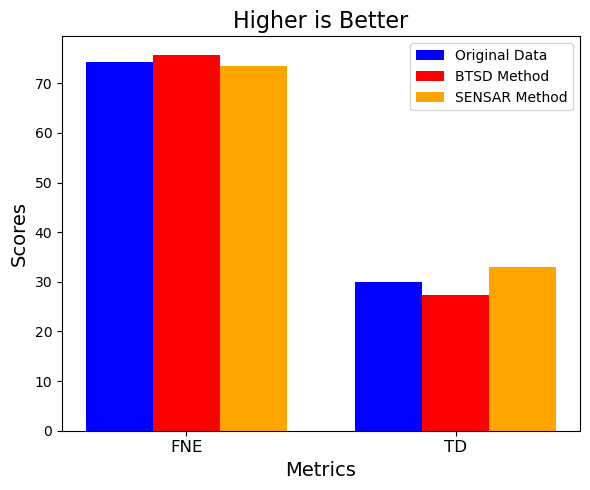

[-0.25  0.75] [0.7454003779613183, 0.547255934551392] [0.7448969154133531, 0.67937946741124] [0.7465537168632161, 0.5436586236610884]


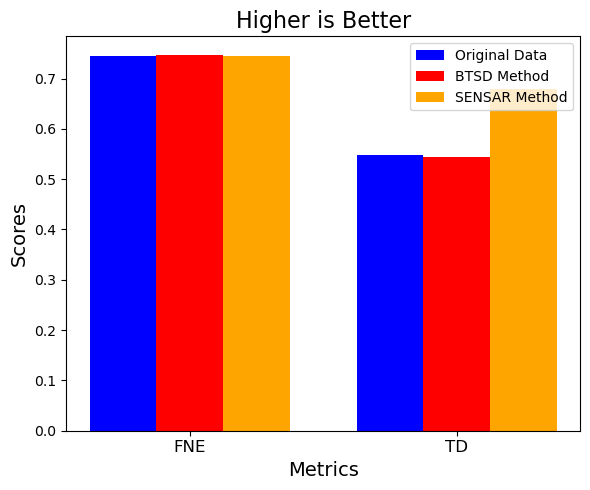

[-0.25  0.75] [0.3160832085307562, 0.4522063099008049] [0.3163522008747221, 0.2857928561725746] [0.31508675792285396, 0.34260352885442635]


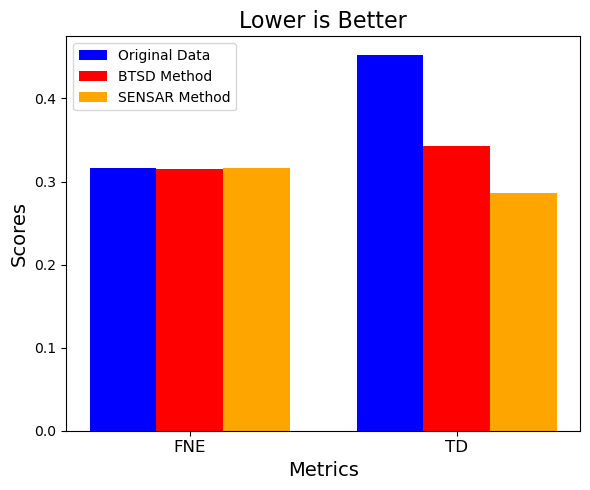

In [39]:
import numpy as np

fne_scores = {'cluster_number': 4, 'ch-score': 74.2255797395344, 'silhoutte-score': 0.7454003779613183, 'db-score': 0.3160832085307562}
td_scores = {'cluster_number': 4, 'ch-score': 30.004602732589532, 'silhoutte-score': 0.547255934551392, 'db-score': 0.4522063099008049}

fne_scores_filtered = {'cluster_number': 4, 'ch-score': 73.56211604924769, 'silhoutte-score': 0.7448969154133531, 'db-score': 0.3163522008747221}
# td_scores_filtered = {'cluster_number': 4, 'ch-score': 95.47622991419387, 'silhoutte-score': 0.670700691119177, 'db-score': 0.06806745716596763}
td_scores_filtered = {'cluster_number': 4, 'ch-score': 32.97253458755273, 'silhoutte-score': 0.67937946741124, 'db-score': 0.2857928561725746}

fne_scores_filtered_old_method = {'cluster_number': 4, 'ch-score': 75.68470188418574, 'silhoutte-score': 0.7465537168632161, 'db-score': 0.31508675792285396}
td_scores_filtered_old_method = {'cluster_number': 4, 'ch-score': 27.37454752712959, 'silhoutte-score': 0.5436586236610884, 'db-score': 0.34260352885442635}

def get_scores_plots(metrics, originalScores, filteredScores, filteredScoresOld, title = 'Comparison of different Scores of Two Datasets for Two Algorithms'):
    # Set up the bar plot
    x = np.arange(2)  # label locations
    width = 0.25  # width of the bars

    fig, ax = plt.subplots(figsize=(6, 5))

    # Plot bars for each dataset
    print(x - width, originalScores, filteredScores, filteredScoresOld)
    bars1 = ax.bar(x - width, originalScores, width, label='Original Data', color='blue')
    bars2 = ax.bar(x, filteredScoresOld, width, label='BTSD Method', color='red')
    bars3 = ax.bar(x + width, filteredScores, width, label='SENSAR Method', color='orange')

    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('Metrics', fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)
    ax.set_title(title,  fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(["FNE", "TD"], fontsize=12)
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.savefig(f"{metrics}.png", dpi=300)
    plt.show()

get_scores_plots(metrics = "./Plots/Sam_plots/sam_CH", originalScores= [fne_scores['ch-score'], td_scores['ch-score']], filteredScores= [fne_scores_filtered['ch-score'], td_scores_filtered['ch-score']], filteredScoresOld= [fne_scores_filtered_old_method['ch-score'], td_scores_filtered_old_method['ch-score']], title= 'Higher is Better')
get_scores_plots(metrics = "./Plots/Sam_plots/sam_SH", originalScores= [fne_scores['silhoutte-score'], td_scores['silhoutte-score']], filteredScores= [fne_scores_filtered['silhoutte-score'], td_scores_filtered['silhoutte-score']], filteredScoresOld= [fne_scores_filtered_old_method['silhoutte-score'], td_scores_filtered_old_method['silhoutte-score']], title= 'Higher is Better')
get_scores_plots(metrics = "./Plots/Sam_plots/sam_DB", originalScores= [fne_scores['db-score'], td_scores['db-score']], filteredScores= [fne_scores_filtered['db-score'], td_scores_filtered['db-score']], filteredScoresOld= [fne_scores_filtered_old_method['db-score'], td_scores_filtered_old_method['db-score']], title= 'Lower is Better')


In [34]:
## Get dynamic window

def get_time_window(original_data, min_window = 1, max_window = 6):
    # unique_sensor = original_data.sensor_name.unique()
    # fnq_adjacency_matrix_filtered = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)
    
    best_window = None
    highest_score = float('-inf')  # Start with the lowest possible value
    for window in range(min_window, max_window+1):
        fd = anomaly_detection_and_removal(original_data, f'{window}h')
        print(fd.shape)
        if fd.empty: continue
        fnq_adjacency_matrix_filtered = get_adjMat_TD(fd)
        clustering_scores = get_clusters_and_scores(fnq_adjacency_matrix_filtered, n_clusters=4)
        current_score = clustering_scores['ch-score']
        print(f"current window: {window}, current ch score: {current_score}")
        if current_score > highest_score:
            highest_score = current_score
            best_window = window
    return best_window, highest_score

bw, hs = get_time_window(df, 1, 12)
print(f"best window: {bw}, highest ch score: {hs}")

(6709, 7)


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28356\319371477.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_emb

,0
bathroom_door,0
bathroom_button,0
bathroom_light,0
bedroom_light,1
bedroom_button,1
kitchen_light,3
kitchen_motion,3
living_button,2
living_light,2


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


{'cluster_number': 4, 'ch-score': 32.97253458755273, 'silhoutte-score': 0.67937946741124, 'db-score': 0.2857928561725746, 'cluster': array([0, 0, 0, 1, 1, 3, 3, 2, 2])}
current window: 1, current ch score: 32.97253458755273
(8301, 7)


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28356\319371477.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_emb

,0
bathroom_door,1
bathroom_button,1
bathroom_light,1
bedroom_light,0
bedroom_button,2
kitchen_light,0
kitchen_motion,0
living_light,3


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


{'cluster_number': 4, 'ch-score': 10.273545004801658, 'silhoutte-score': 0.25030254374866157, 'db-score': 0.48986368324226925, 'cluster': array([1, 1, 1, 0, 2, 0, 0, 3])}
current window: 2, current ch score: 10.273545004801658
(14520, 7)


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28356\319371477.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_emb

,0
bathroom_door,0
bathroom_button,0
bathroom_light,0
bedroom_light,2
bedroom_button,2
kitchen_light,3
kitchen_motion,3
living_button,1
living_light,1


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


{'cluster_number': 4, 'ch-score': 30.186494074828683, 'silhoutte-score': 0.5471196282741485, 'db-score': 0.4515892673881612, 'cluster': array([0, 0, 0, 2, 2, 3, 3, 1, 1])}
current window: 3, current ch score: 30.186494074828683
(14240, 7)


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28356\319371477.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_emb

,0
bathroom_door,1
bathroom_button,1
bathroom_light,1
bedroom_light,3
bedroom_button,3
kitchen_light,2
kitchen_motion,2
living_button,0
living_light,0


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


{'cluster_number': 4, 'ch-score': 22.377708499300255, 'silhoutte-score': 0.5028676449361927, 'db-score': 0.4693414694974894, 'cluster': array([1, 1, 1, 3, 3, 2, 2, 0, 0])}
current window: 4, current ch score: 22.377708499300255
(0, 7)
(18015, 7)


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28356\319371477.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_emb

,0
bathroom_door,0
bathroom_button,0
bathroom_light,0
bedroom_light,2
bedroom_button,2
kitchen_light,1
kitchen_motion,1
living_button,3
living_light,3


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


{'cluster_number': 4, 'ch-score': 21.879046612726953, 'silhoutte-score': 0.4998953500131285, 'db-score': 0.47020524710316114, 'cluster': array([0, 0, 0, 2, 2, 1, 1, 3, 3])}
current window: 6, current ch score: 21.879046612726953
(0, 7)
(22729, 7)


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28356\319371477.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_emb

,0
bathroom_door,3
bathroom_button,3
bathroom_light,3
bedroom_light,1
bedroom_button,1
kitchen_light,0
kitchen_motion,0
living_button,2
living_light,2


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


{'cluster_number': 4, 'ch-score': 29.800406264975106, 'silhoutte-score': 0.5465720497661348, 'db-score': 0.4520637296370565, 'cluster': array([3, 3, 3, 1, 1, 0, 0, 2, 2])}
current window: 8, current ch score: 29.800406264975106
(0, 7)
(0, 7)
(0, 7)
(35163, 7)


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28356\319371477.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[item][curRow.Sensor] += 1
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_emb

,0
bathroom_door,1
bathroom_button,1
bathroom_light,1
bedroom_light,3
bedroom_button,3
kitchen_light,2
kitchen_motion,2
living_button,0
living_light,0


{'cluster_number': 4, 'ch-score': 29.852349382311086, 'silhoutte-score': 0.5475427247748426, 'db-score': 0.4512853306980352, 'cluster': array([1, 1, 1, 3, 3, 2, 2, 0, 0])}
current window: 12, current ch score: 29.852349382311086
best window: 1, highest ch score: 32.97253458755273


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
